# Next-Word Prediction with LSTM

This notebook demonstrates a simple next-word prediction pipeline using an LSTM-based language model (TensorFlow / Keras). The project uses a cleaned text file (`metamorphosis_clean.txt`) as the training corpus and shows the full flow: tokenization, sequence creation, padding, model definition, training, and inference (generating the next words).

Sections in this notebook:
- Imports and setup
- Data loading and preprocessing
- Building the LSTM model
- Training and evaluation
- Simple inference loop to generate next words

Notes: replace `metamorphosis_clean.txt` with your own plain-text corpus if you want to train on a different dataset. For reproducible runs, pin TensorFlow to a compatible version (see README).

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Data loading and preprocessing

We load the full text file into a single string, then use Keras' Tokenizer to build a word index. The notebook splits the text into lines and builds incremental n-gram sequences from each line (e.g. `[w1, w2] -> w3`, `[w1, w2, w3] -> w4`, ...). Sequences are padded to the same length so they can be batched.

Key preprocessing steps:
- Tokenize the text to integers (word -> index).
- Build input sequences of increasing prefix lengths for next-word prediction.
- Pad sequences to a fixed length with `pad_sequences` (pre-padding).
- Split sequences into `X` (prefixes) and `y` (next word), then one-hot encode `y` with `to_categorical`.

In [1]:
with open("metamorphosis_clean.txt", "r") as f:
    input_text = f.read()
print(input_text)


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked.

"What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of her lower arm
t

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([input_text])
tokenizer.word_index

{'the': 1,
 'to': 2,
 'and': 3,
 'he': 4,
 'his': 5,
 'of': 6,
 'was': 7,
 'it': 8,
 'had': 9,
 'in': 10,
 'that': 11,
 'a': 12,
 'as': 13,
 'gregor': 14,
 'with': 15,
 'she': 16,
 'him': 17,
 'her': 18,
 'would': 19,
 'not': 20,
 'but': 21,
 'at': 22,
 'for': 23,
 'they': 24,
 'on': 25,
 'all': 26,
 'room': 27,
 'from': 28,
 'could': 29,
 'be': 30,
 'out': 31,
 'have': 32,
 'if': 33,
 'there': 34,
 'been': 35,
 "gregor's": 36,
 'so': 37,
 'father': 38,
 'sister': 39,
 'this': 40,
 'now': 41,
 'himself': 42,
 'door': 43,
 'then': 44,
 'back': 45,
 'mother': 46,
 'up': 47,
 'even': 48,
 'into': 49,
 'no': 50,
 'did': 51,
 'more': 52,
 'one': 53,
 'their': 54,
 'when': 55,
 'were': 56,
 'what': 57,
 'about': 58,
 'them': 59,
 'way': 60,
 'only': 61,
 'time': 62,
 'i': 63,
 'by': 64,
 'than': 65,
 'you': 66,
 'just': 67,
 'said': 68,
 'little': 69,
 'any': 70,
 'do': 71,
 'get': 72,
 'other': 73,
 'still': 74,
 'first': 75,
 'or': 76,
 'made': 77,
 'go': 78,
 'some': 79,
 'while': 80,
 's

In [40]:
len(tokenizer.word_index)

2617

In [15]:
sequences = []
for sen in input_text.split('\n'):
    tokenized_sentence = tokenizer.texts_to_sequences([sen])[0]
    for i in range(1,len(tokenized_sentence)):
        sequences.append(tokenized_sentence[:i+1])
# print(sequences)


[[1313, 139], [1313, 139, 55], [1313, 139, 55, 14], [1313, 139, 55, 14, 93], [1313, 139, 55, 14, 93, 935], [1313, 139, 55, 14, 93, 935, 28], [1313, 139, 55, 14, 93, 935, 28, 1314], [1313, 139, 55, 14, 93, 935, 28, 1314, 936], [1313, 139, 55, 14, 93, 935, 28, 1314, 936, 4], [1313, 139, 55, 14, 93, 935, 28, 1314, 936, 4, 241], [42, 1315], [42, 1315, 10], [42, 1315, 10, 5], [42, 1315, 10, 5, 112], [42, 1315, 10, 5, 112, 49], [42, 1315, 10, 5, 112, 49, 12], [42, 1315, 10, 5, 112, 49, 12, 721], [42, 1315, 10, 5, 112, 49, 12, 721, 1316], [42, 1315, 10, 5, 112, 49, 12, 721, 1316, 4], [42, 1315, 10, 5, 112, 49, 12, 721, 1316, 4, 159], [42, 1315, 10, 5, 112, 49, 12, 721, 1316, 4, 159, 25], [5, 1317], [5, 1317, 84], [5, 1317, 84, 45], [5, 1317, 84, 45, 3], [5, 1317, 84, 45, 3, 33], [5, 1317, 84, 45, 3, 33, 4], [5, 1317, 84, 45, 3, 33, 4, 447], [5, 1317, 84, 45, 3, 33, 4, 447, 5], [5, 1317, 84, 45, 3, 33, 4, 447, 5, 85], [5, 1317, 84, 45, 3, 33, 4, 447, 5, 85, 12], [5, 1317, 84, 45, 3, 33, 4, 447

In [21]:
max_len = max([len(x) for x in sequences])
sequences = pad_sequences(sequences, maxlen=max_len,padding='pre')

In [29]:
X = sequences[:,:-1]
y = sequences[:,-1]
y = to_categorical(y,num_classes=len(tokenizer.word_index)+1)

In [26]:
X.shape

(20205, 16)

In [30]:
y.shape

(20205, 2618)

## Model architecture and hyperparameters

A straightforward LSTM language model is defined using Keras' Sequential API. The notebook uses an Embedding layer to learn dense word vectors, followed by a single LSTM layer and a Dense softmax output over the vocabulary.

Things to consider and tune:
- Embedding size (currently 100).
- LSTM units (currently 200).
- Vocabulary size (derived from tokenizer; the notebook hardcodes an example value in the model definition — replace with `len(tokenizer.word_index)+1` for general runs).
- Input length (max sequence length) — used by the Embedding layer.

## Training and notes

The model is compiled with categorical crossentropy and trained for a modest number of epochs (example uses 50). For larger corpora or improved performance, consider adding callbacks (ModelCheckpoint, EarlyStopping), using a validation split, and experimenting with learning rates and optimizers.

Training tips:
- Save the model weights after the best validation accuracy.
- Use batch sizes appropriate for your GPU/CPU memory.
- For faster training, reduce the vocabulary (filter rare words) or use subword tokenization.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

In [49]:
model = Sequential()
model.add(Embedding(2618,100, input_length=17))
model.add(LSTM(200))
model.add(Dense(2618,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 17, 100)        │       261,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2618)           │       526,218 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,028,818 (3.92 MB)

 Trainable params: 1,028,818 (3.92 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(
    X, y,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9358 - loss: 0.1913 - val_accuracy: 0.9327 - val_loss: 0.2029
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.9358 - loss: 0.1793 - val_accuracy: 0.9297 - val_loss: 0.2259
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.9358 - loss: 0.1782 - val_accuracy: 0.9287 - val_loss: 0.2412
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9359 - loss: 0.1771 - val_accuracy: 0.9290 - val_loss: 0.2600
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.9357 - loss: 0.1761 - val_accuracy: 0.9292 - val_loss: 0.2713
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.9358 - loss: 0.1761 - val_accuracy: 0.9277 - val_loss: 0.2838
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9365 - loss: 0.1763 - val_accuracy: 0.9282 - val_loss: 0.2930
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9353 - loss: 0.1758 - 

## Inference / Generating text

A small example loop below demonstrates how to seed the model with a short phrase and iteratively predict the next word. Notes:
- The notebook uses argmax on the softmax output which picks the single most likely word; sampling from the distribution (temperature sampling) can produce more varied, creative outputs.
- Make sure to preprocess the seed text the same way as training (tokenization and padding).
- Save and reload both the trained model and the tokenizer for reproducible inference outside the notebook.

In [72]:
text = "random setting of the house"
for i in range(5):
    token_text = tokenizer.texts_to_sequences([text])
    print(token_text)
    padded_seq = pad_sequences(token_text, maxlen=max_len,padding='pre')
    pos = np.argmax(model.predict([padded_seq]))
    for word,index in tokenizer.word_index.items():
        if index==pos:
            text = text + ' ' + word
            print(text)


[[6, 1, 958]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
random setting of the house over
[[6, 1, 958, 100]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
random setting of the house over to
[[6, 1, 958, 100, 2]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
random setting of the house over to end
[[6, 1, 958, 100, 2, 436]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
random setting of the house over to end and
[[6, 1, 958, 100, 2, 436, 3]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
random setting of the house over to end and he


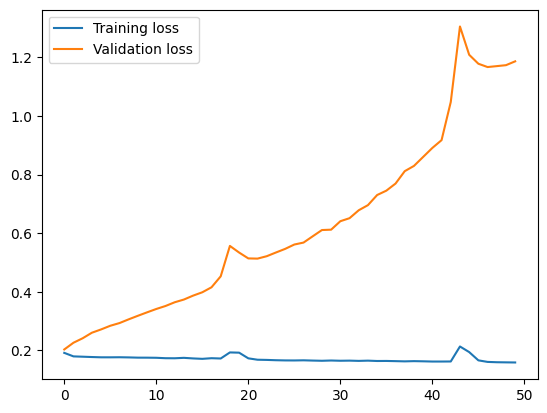

In [73]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

## Conclusion

The training loss stays low while validation loss rises. In simple terms: the model learns the training examples well but does worse on unseen data (overfitting).

Here is how we can fix this:
* Shuffle and split the data properly (keep a separate test set).
* Use EarlyStopping and save the best model (ModelCheckpoint).
* Regularize or reduce model size, and check example predictions by hand.
* Gather **more training data** for better generalization.
* Try **hyperparameter tuning** (embedding size, LSTM units, learning rate, dropout).
* Explore **advanced architectures** such as stacked/bidirectional LSTMs or Transformer-based models.

